In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import shutil
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:

os.chdir('/content/drive/My Drive/project_captcha/dataset/combined')
!ls

## Morphological Closing and thresholding

In [104]:
im = cv2.imread('22_D27QG.jpg',-1)
im.shape

(50, 200, 3)

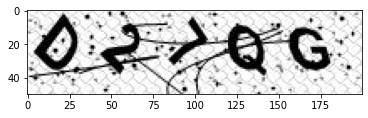

In [105]:
plt.imshow(im,cmap='gray')

(50, 200)


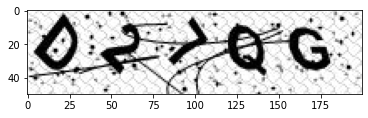

In [106]:
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')
print(im_gray.shape)

Applying morphological operations of closing and opening, kernel to be used appropriately

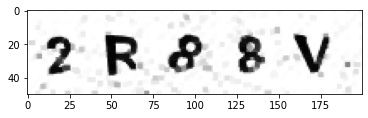

In [ ]:
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(im_gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(close, cmap='gray')

In [ ]:
print(set(close.flatten()))

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 123, 124, 125, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,

Applying different thresholding

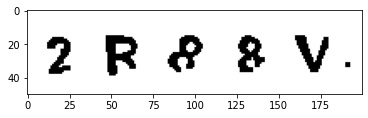

In [ ]:
ret,th_otsu = cv2.threshold(close,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_otsu, cmap='gray')

### What if we rescale 


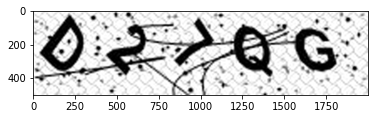

In [107]:
im_rescaled = cv2.resize(im_gray,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
plt.imshow(im_rescaled, cmap='gray')

In [108]:
im_rescaled.shape

(500, 2000)

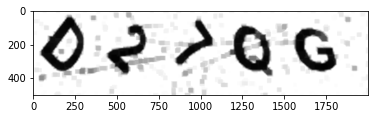

In [109]:
kernel = np.ones((23,23),np.uint8)
close_re = cv2.morphologyEx(im_rescaled, cv2.MORPH_CLOSE, kernel)
plt.imshow(close_re, cmap='gray')

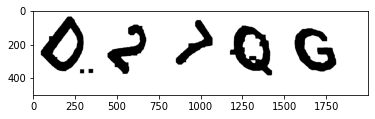

In [110]:
ret,th_otsu_re = cv2.threshold(close_re,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_otsu_re, cmap='gray')

In [111]:
print(set(th_otsu_re.flatten()))

{0, 255}


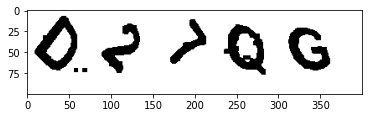

In [112]:
im_orig = cv2.resize(th_otsu_re,None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_CUBIC)
plt.imshow(im_orig, cmap='gray')

In [113]:
print(set(im_orig.flatten()))

{0, 255}


Testing with easyocr

In [ ]:
!pip install easyocr

In [89]:
import easyocr
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [102]:
result = reader.readtext(im_orig, detail=0)
print(result)

['0.? ?a G']


Processing all images

In [114]:
files = sorted(glob.glob('*.jpg'))

for file in files:
    im =  cv2.imread(file,-1)
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_rescaled = cv2.resize(im_gray,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    kernel = np.ones((23,23),np.uint8)
    close_re = cv2.morphologyEx(im_rescaled, cv2.MORPH_CLOSE, kernel)
    ret,th = cv2.threshold(close_re,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    processed = cv2.resize(th,None, fx = 0.2, fy = 0.2, interpolation = cv2.INTER_CUBIC)

    cv2.imwrite('../processed/'+file, processed)

## Deskewing letters

In [5]:
os.chdir('/content/drive/My Drive/project_captcha/dataset/processed')

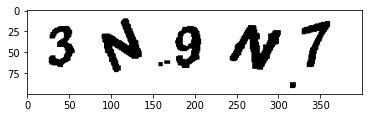

In [6]:
im = cv2.imread('4_3N9N7.jpg',-1)
plt.imshow(im, cmap='gray')

In [7]:
im.shape

(100, 400)

In [15]:
print(set(im.flatten()))

{0, 1, 2, 3, 4, 5, 6, 248, 249, 250, 251, 252, 253, 254, 255}


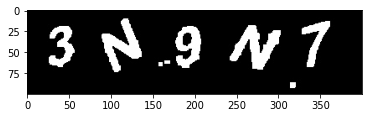

In [10]:
im = cv2.bitwise_not(im)
plt.imshow(im, cmap='gray')

In [11]:
print(set(im.flatten()))

{0, 1, 2, 3, 4, 5, 6, 248, 249, 250, 251, 252, 253, 254, 255}


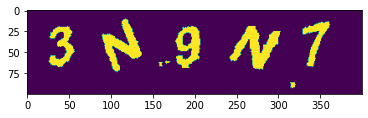

In [42]:
image_copy = im.copy()

contours, hierarchy = cv2.findContours(image_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# print(contours)
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
cv2.drawContours(image_copy, contours, -1, (0,0,255), 0)

plt.imshow(image_copy)


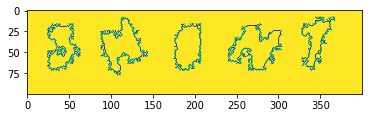

In [43]:
maxArea = 100.0
good_cnts = []
for i in range(0, len(contours)):
    area = cv2.contourArea(contours[i])
    # print(area)
    if area > maxArea:
        good_cnts.append(contours[i])

temp_img = np.ones((100,400))*255
cv2.drawContours(temp_img, good_cnts, -1, (0,0,255), 0)
plt.imshow(temp_img)


((341.19512939453125, 35.808631896972656), (68.26898193359375, 34.279991149902344), -71.91655731201172)
[[346  73]
 [314  62]
 [335  -1]
 [368   8]]
((273.3070373535156, 43.05738830566406), (58.55892562866211, 57.27108383178711), -65.37643432617188)
[[287  81]
 [235  57]
 [259   4]
 [311  28]]
((191.0, 43.5), (32.0, 55.0), 0.0)
[[175  71]
 [175  16]
 [207  16]
 [207  71]]
((111.6153793334961, 42.42308044433594), (56.024723052978516, 55.19267272949219), -33.6900634765625)
[[103  80]
 [ 72  35]
 [119   3]
 [150  49]]
((43.5, 43.5), (39.0, 55.0), -0.0)
[[24 71]
 [24 16]
 [63 16]
 [63 71]]


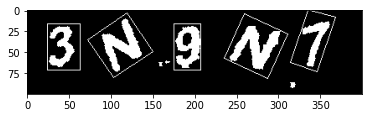

In [50]:
good_cnts = sorted(good_cnts, key=lambda ctr: cv2.boundingRect(ctr)[0], reverse=True)
for cnt in good_cnts:
    rect = cv2.minAreaRect(cnt)
    print(rect)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(box)
    cv2.drawContours(image_copy,[box],0,(255),1)

plt.imshow(image_copy,cmap='gray')

## Cropping and rotating each box

In [51]:
def crop_rect(img, rect):
    # get the parameter of the small rectangle
    center = rect[0]
    size = rect[1]
    angle = rect[2]
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if angle < -45:
	    angle = -(90 + angle)
    else:
        angle = -angle
    # get row and col num in img
    height, width = img.shape[0], img.shape[1]
    print("width: {}, height: {}".format(width, height))

    M = cv2.getRotationMatrix2D(center, -angle, 1)
    
    img_rot = cv2.warpAffine(img, M, (width, height), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    # plt.imshow(img_rot)
    img_crop = cv2.getRectSubPix(img_rot, size, center)
    # plt.imshow(img_crop,cmap='gray')
    return img_crop, img_rot

width: 400, height: 100
width: 400, height: 100
width: 400, height: 100
width: 400, height: 100
width: 400, height: 100


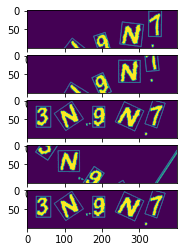

In [52]:
fig, axs = plt.subplots(5)
i=0
for cnt in good_cnts:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img_crop, img_rot = crop_rect(image_copy, rect)
    axs[i].imshow(img_rot)
    i=i+1

Another method

In [ ]:
fig, axs = plt.subplots(5)
i=0
for cnt in good_cnts:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)